#Adicionando as bibliotecas necessárias...

In [858]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#Importando e fazendo a limpeza dos dados

In [859]:
dataset = pd.read_csv('./autism_screening.csv')
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [860]:
# análise dos dados
dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [861]:
# removendo algumas colunas irrelevantes e renomeando outras para melhorar a legibilidade
dataset = dataset.drop(columns =['contry_of_res', 'used_app_before', 'age_desc', 'relation', 'result'])
dataset = dataset.rename(columns={'austim': 'autism_history', 'Class/ASD': 'autism'})
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism_history,autism
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,NO


In [862]:
# analisando os valores únicos de cada coluna
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A1_Score: [1 0]
A2_Score: [1 0]
A3_Score: [1 0]
A4_Score: [1 0]
A5_Score: [0 1]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [0 1]
age: [ 26.  24.  27.  35.  40.  36.  17.  64.  29.  33.  18.  31.  30.  34.
  38.  42.  43.  48.  37.  55.  50.  53.  20.  28.  21. 383.  47.  32.
  44.  nan  19.  58.  45.  22.  39.  25.  23.  54.  60.  41.  46.  56.
  61.  59.  52.  49.  51.]
gender: ['f' 'm']
ethnicity: ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
autism: ['NO' 'YES']


In [863]:
# juntando colunas de valores similares e removendo colunas com nan
dataset = dataset.replace('?', np.nan)
dataset = dataset.replace(383., np.nan)
dataset = dataset.replace('others', 'Others')
dataset = dataset.replace('Middle Eastern ', 'Middle_Eastern')
dataset = dataset.replace('South Asian', 'Asian')
dataset = dataset.replace('Hispanic', 'White-European')
dataset = dataset.replace('Turkish', 'Middle_Eastern')
dataset = dataset.dropna()

# analisando os novos dados
for col in dataset.columns:
    print(f"{col}: {dataset[col].unique()}")

A1_Score: [1 0]
A2_Score: [1 0]
A3_Score: [1 0]
A4_Score: [1 0]
A5_Score: [0 1]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [0 1]
age: [26. 24. 27. 35. 36. 17. 64. 29. 33. 18. 31. 30. 42. 40. 48. 37. 55. 50.
 34. 53. 20. 28. 21. 47. 43. 32. 44. 19. 58. 22. 39. 25. 23. 38. 54. 60.
 41. 46. 45. 56. 61. 59. 52. 49. 51.]
gender: ['f' 'm']
ethnicity: ['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle_Eastern'
 'Pasifika']
jundice: ['no' 'yes']
autism_history: ['no' 'yes']
autism: ['NO' 'YES']


In [864]:
# analisando o tipo dos dados
print(dataset.dtypes)

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age               float64
gender             object
ethnicity          object
jundice            object
autism_history     object
autism             object
dtype: object


In [865]:
# convertendo float64 para int64
cols_to_convert = ['age']
dataset[cols_to_convert] = dataset[cols_to_convert].astype('int64')
print(dataset.dtypes)

A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
age                int64
gender            object
ethnicity         object
jundice           object
autism_history    object
autism            object
dtype: object


In [866]:
# fazendo hot encoding nas colunas de dados categóricos e label encoding na coluna de saída
dataset = pd.get_dummies(dataset, columns=['autism_history', 'gender', 'jundice', 'ethnicity'])
dataset['autism'], mapping = pd.factorize(dataset['autism'])
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender_m,jundice_no,jundice_yes,ethnicity_Asian,ethnicity_Black,ethnicity_Latino,ethnicity_Middle_Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_White-European
0,1,1,1,1,0,0,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
1,1,1,0,1,0,0,0,1,0,1,...,True,True,False,False,False,True,False,False,False,False
2,1,1,0,1,1,0,1,1,1,1,...,True,False,True,False,False,True,False,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,True,False,False,False,False,False,False,False,True
5,1,1,1,1,1,0,1,1,1,1,...,True,False,True,False,False,False,False,True,False,False


#Dividindo os dados em conjuntos de treinamento e de testes

In [867]:
X = dataset.drop(columns=['autism'])
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender_m,jundice_no,jundice_yes,ethnicity_Asian,ethnicity_Black,ethnicity_Latino,ethnicity_Middle_Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_White-European
0,1,1,1,1,0,0,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
1,1,1,0,1,0,0,0,1,0,1,...,True,True,False,False,False,True,False,False,False,False
2,1,1,0,1,1,0,1,1,1,1,...,True,False,True,False,False,True,False,False,False,False
3,1,1,0,1,0,0,1,1,0,1,...,False,True,False,False,False,False,False,False,False,True
5,1,1,1,1,1,0,1,1,1,1,...,True,False,True,False,False,False,False,True,False,False


In [868]:
y = dataset['autism']
y.head()

0    0
1    0
2    1
3    0
5    1
Name: autism, dtype: int64

In [869]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Treinamento do modelo de árvore de decisão

In [870]:
model = DecisionTreeClassifier(
    class_weight="balanced",
    criterion="gini",        
    max_depth=10,           
    min_samples_split=5,      
    random_state=30           
)

model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=30)

Acurácia: 0.9289617486338798
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       123
           1       0.89      0.90      0.89        60

    accuracy                           0.93       183
   macro avg       0.92      0.92      0.92       183
weighted avg       0.93      0.93      0.93       183



Acurácia média na validação cruzada: 0.9062457661563474


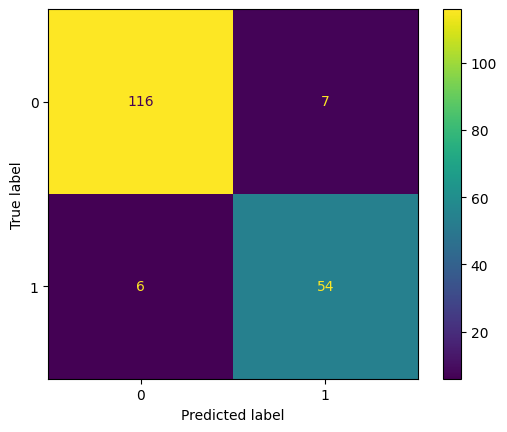

In [871]:
y_pred = model.predict(x_test)

# acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

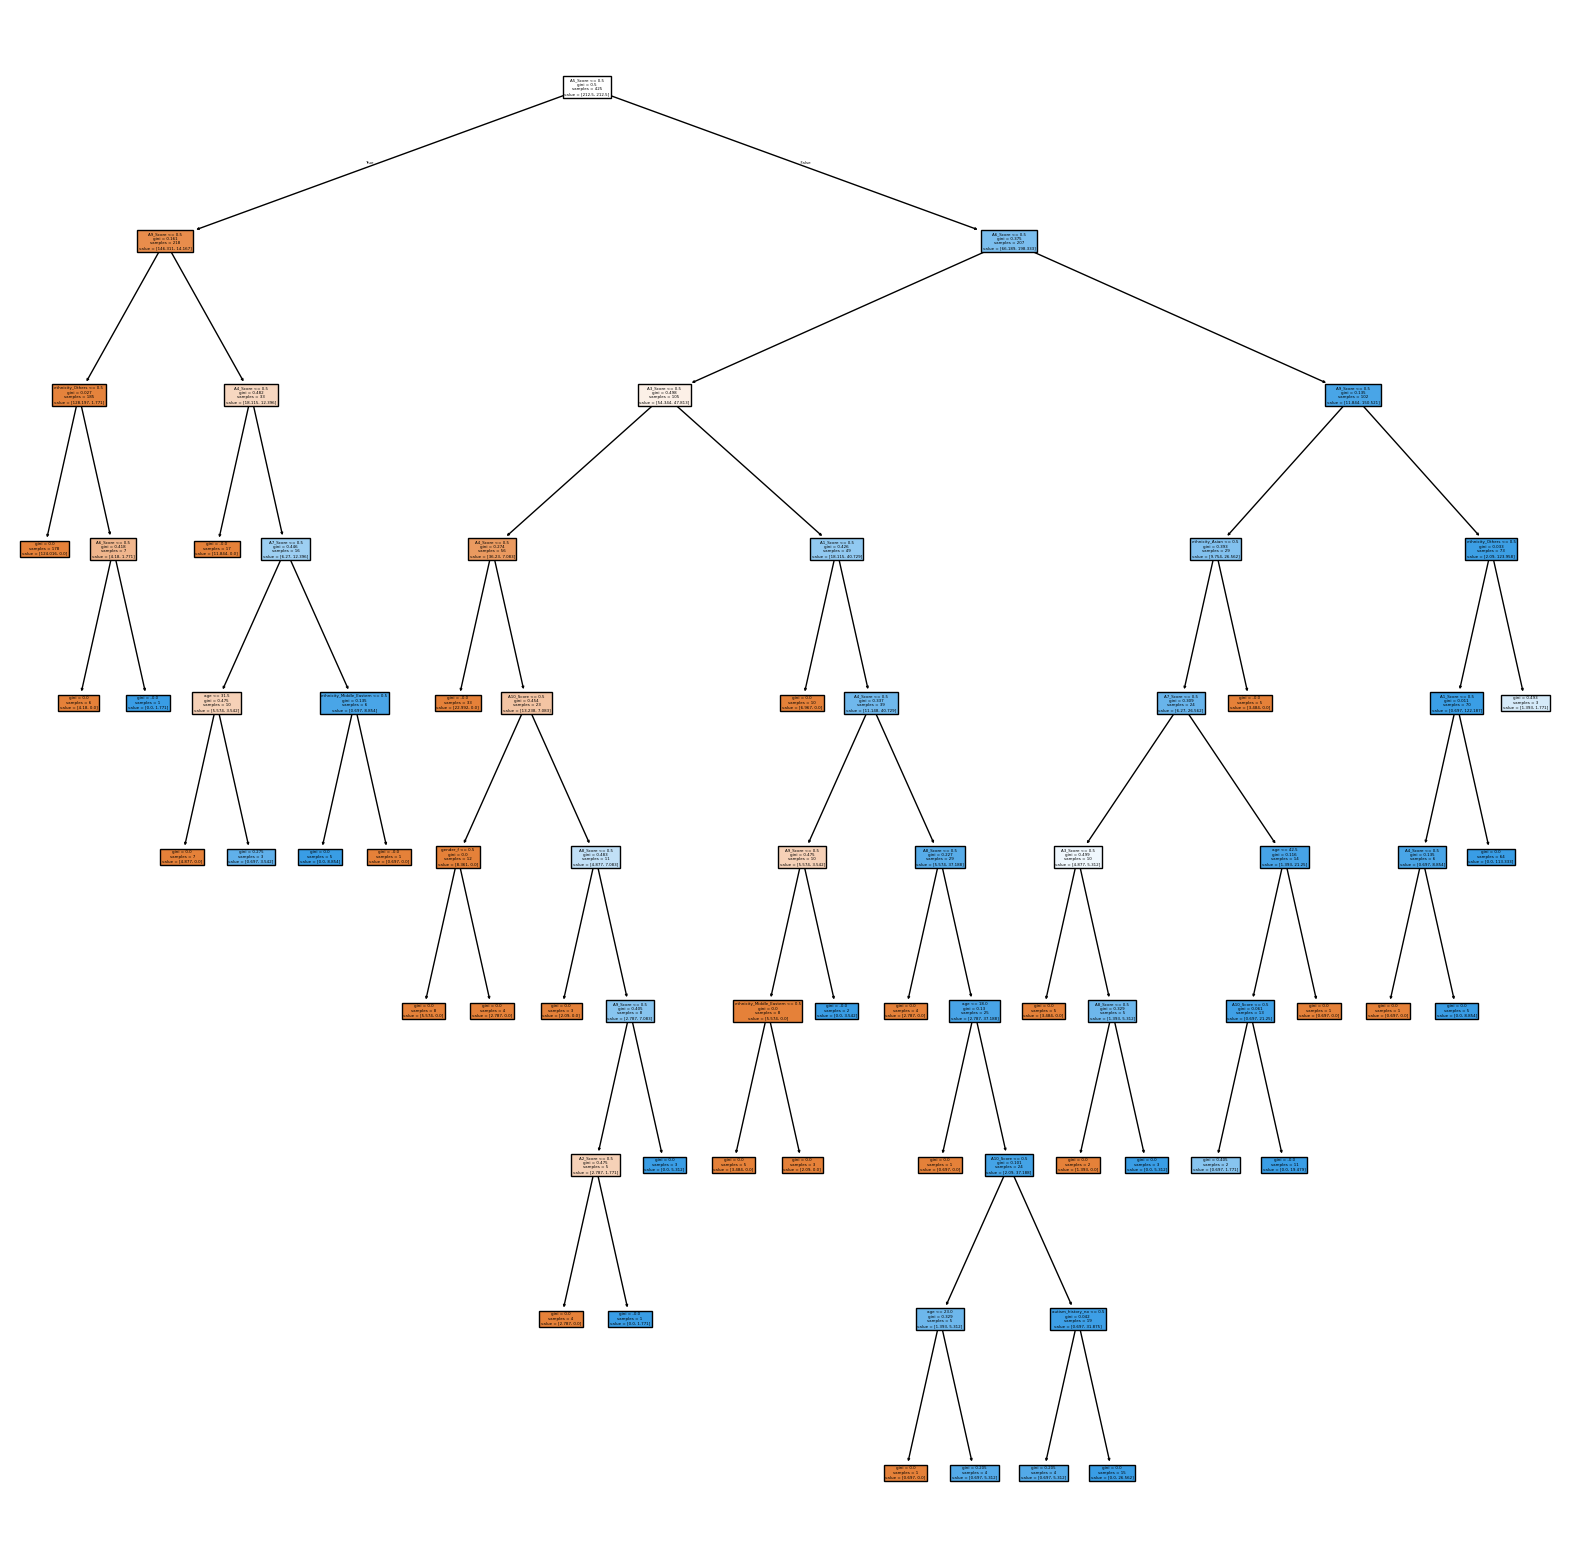

In [872]:
# plotar a árvore
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

#Treinando o modelo de gradient boosting

Acurácia: 0.9726775956284153
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.95      0.97      0.96        60

    accuracy                           0.97       183
   macro avg       0.97      0.97      0.97       183
weighted avg       0.97      0.97      0.97       183

Acurácia média na validação cruzada: 0.9572009212843788


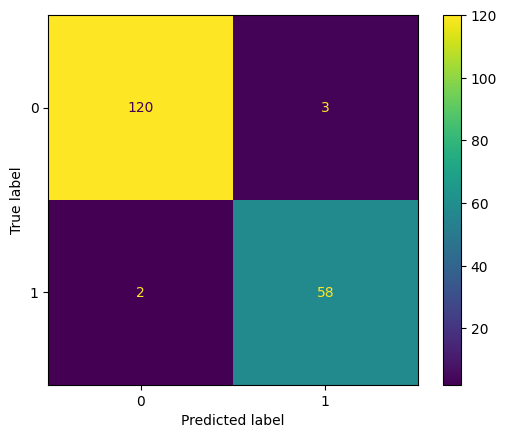

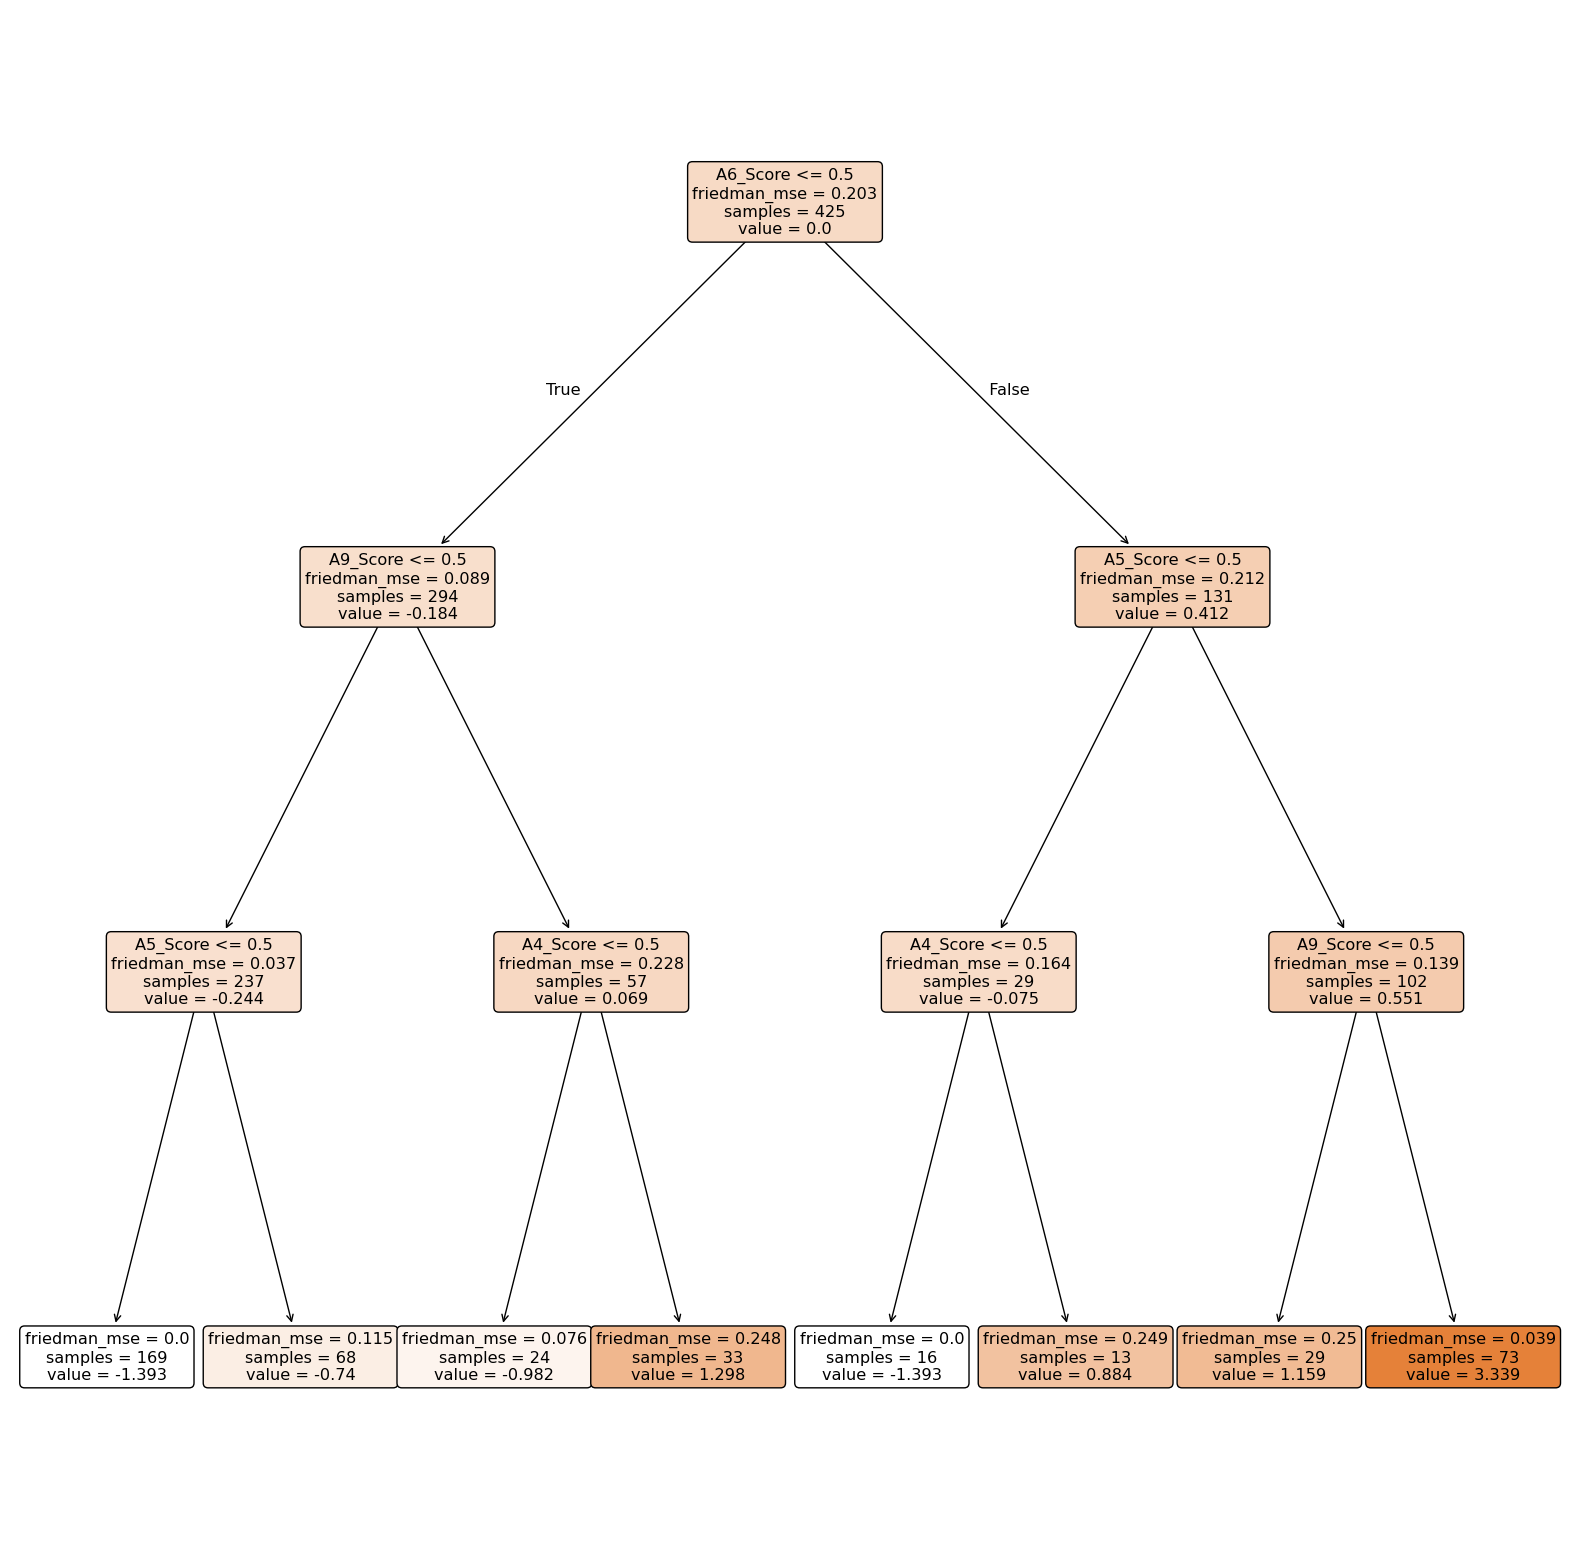

In [873]:
gbmc = GradientBoostingClassifier().fit(x_train,y_train)
y_pred = gbmc.predict(x_test)

# acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

scores = cross_val_score(gbmc, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

tree = gbmc.estimators_[0, 0] 
plt.figure(figsize=(20, 20))
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

#Treinando o modelo de random forest

Acurácia: 0.9508196721311475
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       123
           1       0.95      0.90      0.92        60

    accuracy                           0.95       183
   macro avg       0.95      0.94      0.94       183
weighted avg       0.95      0.95      0.95       183

Acurácia média na validação cruzada: 0.9062457661563474


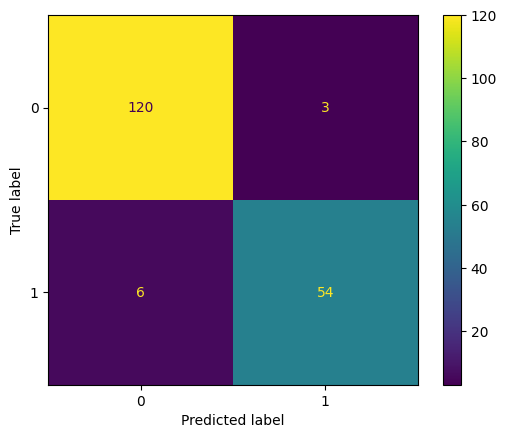

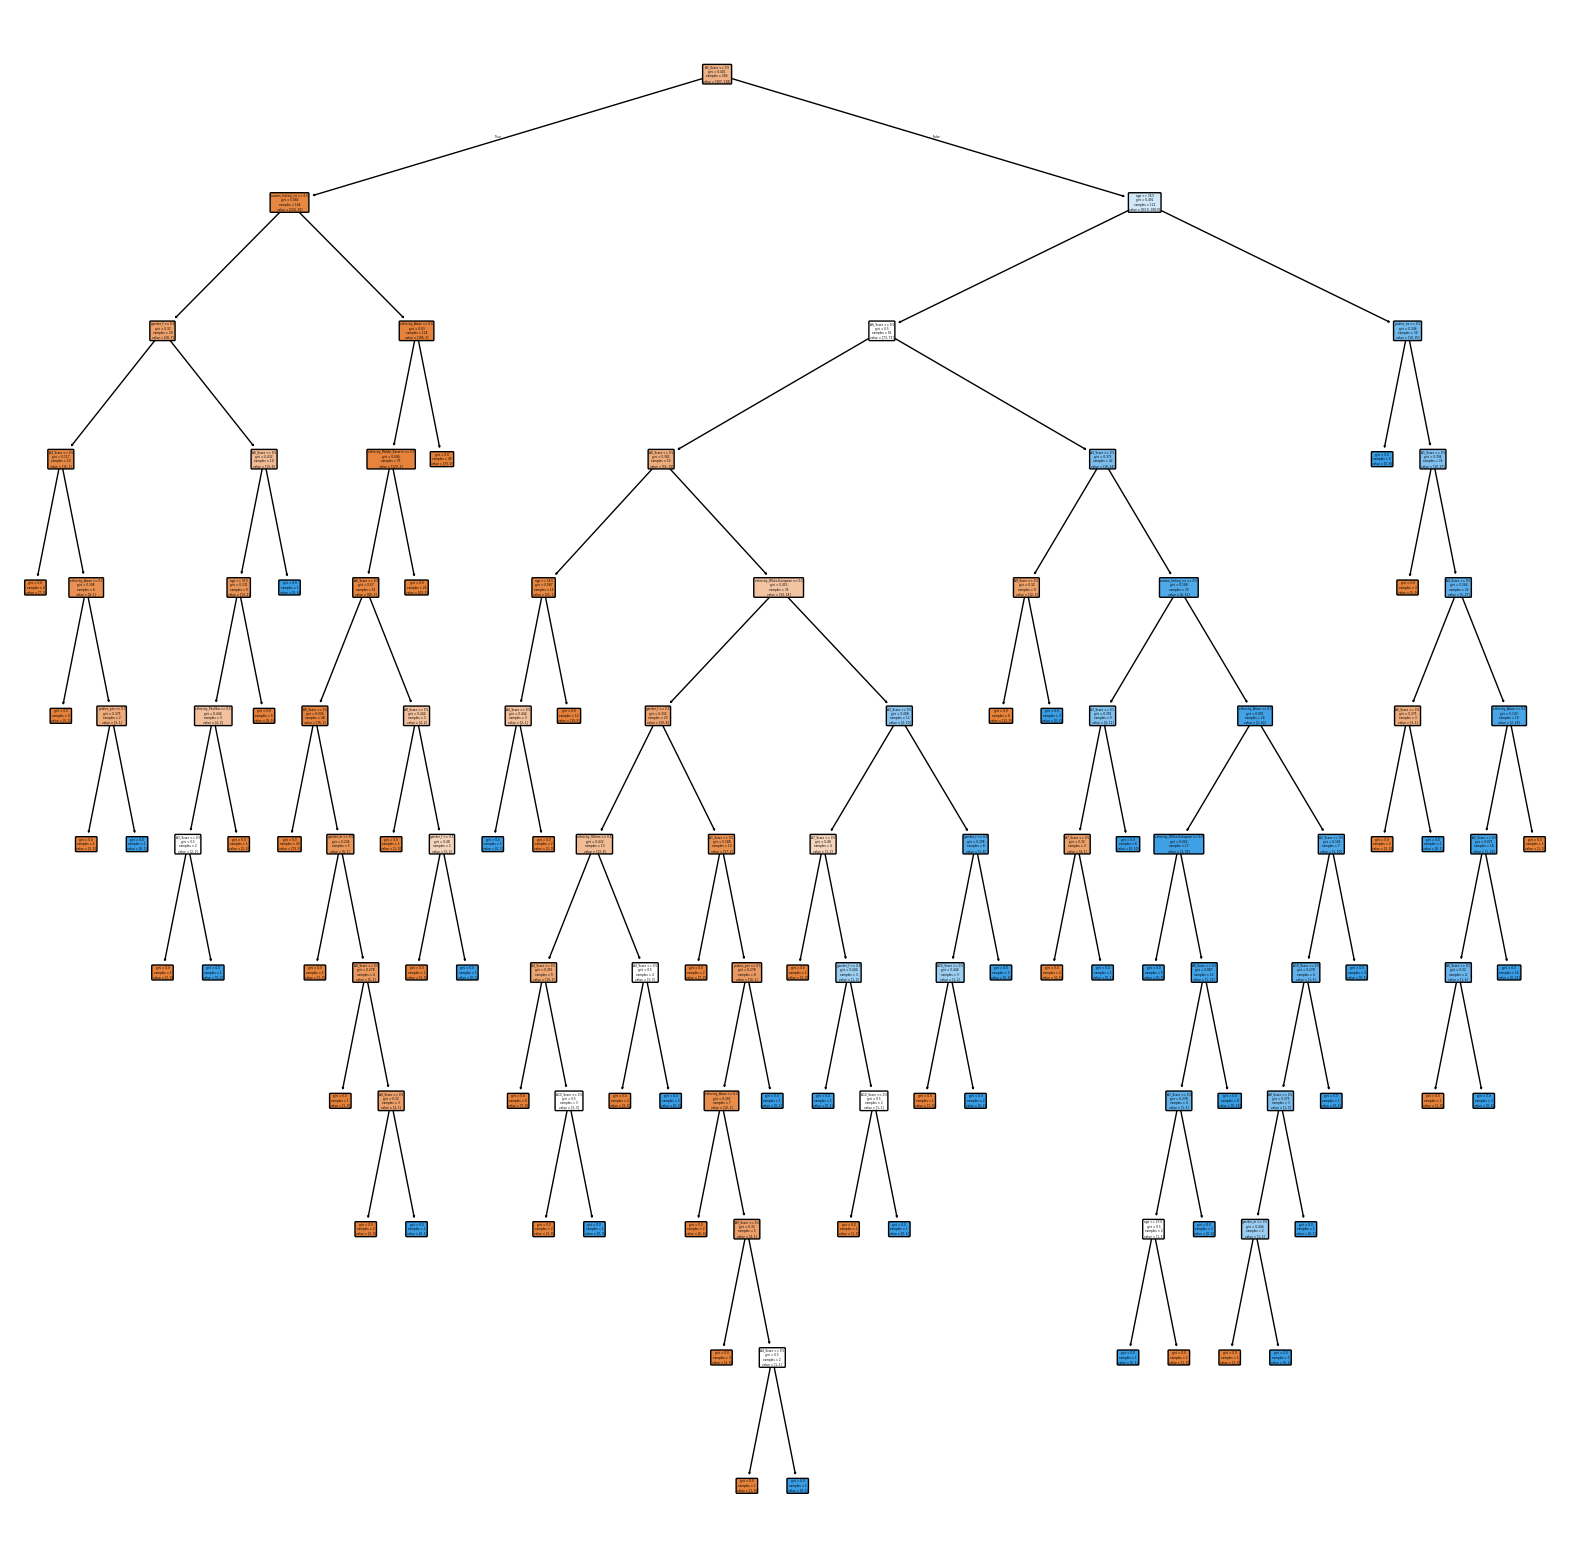

In [874]:
rf = RandomForestClassifier(
  random_state=42,
  criterion='gini',
  max_depth=13,
  )
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# acurácia
print("Acurácia:", accuracy_score(y_test, y_pred))

# relatório detalhado
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média na validação cruzada:", scores.mean())

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='horizontal')

tree = rf.estimators_[0]
plt.figure(figsize=(20, 20))
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

#Classificando os resultados

A1_Score: 0.0548
A2_Score: 0.0299
A3_Score: 0.0477
A4_Score: 0.0906
A5_Score: 0.1252
A6_Score: 0.3155
A7_Score: 0.0534
A8_Score: 0.0269
A9_Score: 0.2007
A10_Score: 0.0250
age: 0.0162
autism_history_no: 0.0002
autism_history_yes: 0.0002
gender_f: 0.0021
gender_m: 0.0005
jundice_no: 0.0000
jundice_yes: 0.0002
ethnicity_Asian: 0.0019
ethnicity_Black: 0.0016
ethnicity_Latino: 0.0032
ethnicity_Middle_Eastern: 0.0006
ethnicity_Others: 0.0027
ethnicity_Pasifika: 0.0000
ethnicity_White-European: 0.0010


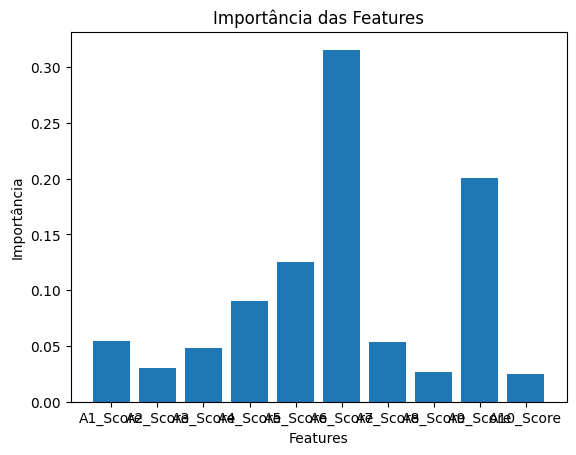

In [875]:
importances = gbmc.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")
    
colunas_desejadas = [
  'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 
  'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score'
  ]
importancias_filtradas = [importances[X.columns.get_loc(col)] for col in colunas_desejadas]

plt.bar(colunas_desejadas, importancias_filtradas)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')
plt.show()